## 2. Simulate different random processes.

b. For each of the following, generate 10000 samples from a distribution with mean = 2 and variance = 2 (3 points):<br>
1. Gaussian distribution.<br>
2. Poisson distribution.<br>
3. Uniform distribution.

In [ ]:
import numpy as np

array_rand = np.zeros((10000,3)) #define 10000x3 matrix
array_rand[:,0] = np.random...(..., array_rand.shape[0]) #Gaussian
array_rand[:,1] = np.random...(...,  array_rand.shape[0]) #Poisson
array_rand[:,2] = np.random...(...,  array_rand.shape[0]) #Uniform


c. Print the mean and variance of each column (2 points)

In [ ]:
print(np...(...)) #print mean of each distribution
print(np...(...))) #print variance of each distribution

d. Plot a histogram for each distribution (2 points)




In [ ]:
import matplotlib.pyplot as plt

bins = np.linspace(-2,6,41) #specifies the binning for the histogram
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Gaussian','Poisson','Uniform'] #titles for each histogram
axes[1].set_xlabel('Value')
axes[0].set_ylabel('Counts')
h = np.zeros((bins.size-1,array_rand.shape[1])) #variable that will store histograms

for i in range(array_rand.shape[1]):
  h[:,i],_,_ = axes[i].hist(...,bins) #generate, plot, and store histogram
  axes[i].set_title(...) #add title to each histogram


e. Print the estimated information content of each distribution in bits (2 points).

In [ ]:
p_h = h/... #normalize h so that it contains probabilities rather than counts
info_h = ... #apply shannon's entropy formula to p_h
print(info_h)

# 3. A model motor neuron
We will recreate Figure 1c from Kennedy and Schwartz 2019 by simulating a motor neuron's response to 5 repetitions of movements toward each of 8 evenly spaced orientations.

a. Define a vector of 8 movement angles for which the neuron's activity will be measured, and a weight vector that represents the neuron's peak tuning of 345 degrees. Convert these values from degrees to radians (which will be useful for future steps) (2 points).

In [ ]:
import numpy as np
import math

move_angles_degrees = np.linspace(0,360,8,endpoint=False) #define a vector of 8 evenly spaced movement angles
move_angles_radians = np.radians(move_angles_degrees) #convert move_angles from degrees to radians
peak_tuning = 345
peak_tuning_radians = np.radians(peak_tuning) #convert peak_tuning from degrees to radians
weights = np.array([math.cos(peak_tuning_radians), math.sin(peak_tuning_radians)]) # define a 2-element unit-length vector using variable 'peak_tuning'

print("Movement Angles (Radians):", move_angles_radians)
print("Peak Tuning (Radians):", peak_tuning_radians)
print("Weights:", weights)


Movement Angles (Radians): [0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]
Peak Tuning (Radians): 6.021385919380437
Weights: [ 0.96592583 -0.25881905]


b. Now, we will simulate the neuron's response over 5 repetitions of each of the 8 movement orientations (6 points).
1. Define a 5x8 numpy array that will store the spikes.
2. Loop over the 8 orientations. For each,<br>
a. Define a unit-length input.<br>
b. Take the dot product of the input and weights.<br>
c. Rescale the drive so that it spans the range [0,50].<br>
d. Simulate 5 repetitions of random spike counts. Counts should be non-negative integers and match the drive (i.e. the expected value of the counts equals the drive) (Hint: you will generate either Gaussian, uniform, or Poisson samples).
3. Print the output

In [ ]:
repetitions = 5
orientations = 8
spikes = np.zeros((repetitions, orientations)) #define a 5x8 numpy array

for i in range(orientations): #loop over each orientation
    input = np.array([math.cos(move_angles_radians[i]), math.sin(move_angles_radians[i])]) #use 'move_angles[i]' to define a unit-length input vector
    drive = np.dot(input, weights) #take the dot product of input and weights
    drive = (drive + 1) * 25 #rescale the drive from the range [-1,1] to the range [0,50]
    spikes[:,i] = np.random.poisson(drive, size=repetitions) #randomly generate spikes based on the drive

print(spikes)

[[41. 33. 13.  7.  2.  7. 29. 47.]
 [53. 36. 24.  6.  0. 14. 31. 52.]
 [60. 30. 20.  2.  1. 11. 27. 46.]
 [44. 45. 23.  5.  0. 13. 41. 59.]
 [41. 41. 20.  1.  1. 12. 39. 55.]]


c. Plot simulated and theoretical predictions. (4 points) <br>
1. Plot the mean and standard deviation of spiking at each of the 8 orientations (which you generated in the last section). <br>
2. Generate a prediction of cosine tuning that peaks at 345 degrees. <br>
3. Rescale the prediction to be in the range [0,50].<br>
4. Plot the result.

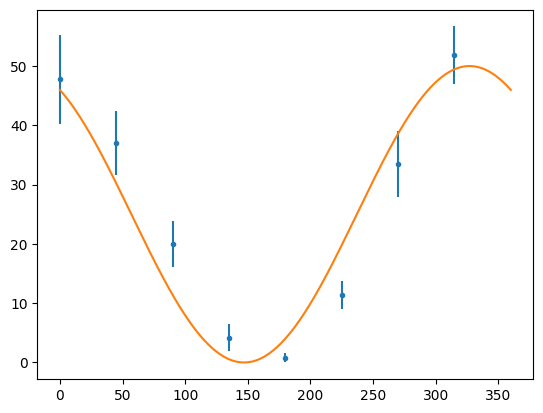

In [ ]:
import matplotlib.pyplot as plt

mean_spikes = np.mean(spikes, axis=0)
stdev_spikes = np.std(spikes, axis=0)

plt.errorbar(np.degrees(move_angles_radians), mean_spikes, yerr=stdev_spikes,fmt='.') #plot means and standard deviations of spikes at each orientation
all_angles = np.linspace(0,360,360) #angles used to plot a smooth cosine tuning curve.
rad_angles = np.radians(all_angles) #convert all_angles to radians
prediction = np.cos(rad_angles - peak_tuning)#generate cosine tuning curve using variables 'rad_angle' and 'peak_tuning' defined in section a.
prediction = prediction = (prediction + 1) * 25 #rescale prediction to be between 0 and 50.
plt.plot(all_angles,prediction) #plot prediction